In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from environment import get_all_scenes
from HierarchicalPRM import HierarchicalPRM
from lectures.IPLazyPRM import LazyPRM
from lectures.IPBasicPRM import BasicPRM
from lectures.IPEnvironment import CollisionChecker
from hierarchical_visualize import  visualize_hierarchical_planning
from scipy.spatial.distance import euclidean

In [2]:
# ---- Konfiguration ----
config_high = {
    "ntry": 5
}

config_low_lazy = {
    "initialRoadmapSize": 15,
    "updateRoadmapSize": 10,
    "kNearest": 8,
    "maxIterations": 10
}

config_low_basic = {
    "numNodes": 30,
    "radius": 4
}

scenes = get_all_scenes()
# %%
# 📁 Ordner anlegen
plot_dir = "plots_hierarchical"
results_dir = "benchmark_results"
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(results_dir, exist_ok=True)

In [3]:
def run_benchmark(subplanner_type, config_local):
    results = []
    SubPlanner = LazyPRM if subplanner_type == "Lazy" else BasicPRM
    print(f"\n🔁 Starte Benchmarks mit Subplanner: {subplanner_type}")

    for scene_name, (scene, limits, (start_pos, goal_pos)) in scenes:
        print(f"\n🔍 Szene: {scene_name}")
        start = [list(start_pos)]
        goal = [list(goal_pos)]

        collision_checker = CollisionChecker(scene, limits)

        planner = HierarchicalPRM(collision_checker, SubPlanner(collision_checker), limits=limits)
        t0 = time.time()
        path = planner.planPath(start, goal, {
            "ntry": config_high["ntry"],
            "subPlannerConfig": config_local
        })
        t1 = time.time()

        # 🔒 Robuste Pfadverarbeitung
        coords = [tuple(p) for p in path if isinstance(p, (list, tuple)) and len(p) == 2] if isinstance(path, list) else []
        euclidean_length = sum(euclidean(a, b) for a, b in zip(coords[:-1], coords[1:])) if coords else 0

        if not coords:
            print(f"❌ Kein Pfad gefunden in Szene: {scene_name}")
            result = {
                "planner": f"Hierarchical-{subplanner_type}",
                "scene": scene_name,
                "hasPath": False,
                "length": 0,
                "euclidean_length": 0,
                "time": t1 - t0,
                "nodes": 0,
                "edges": 0,
                "roadmap_size": 0
            }
            results.append(result)
            continue

        print(f"✅ Pfad gefunden in Szene: {scene_name}, Länge: {len(coords)}")

        # 📸 Visualisierung
        visualize_hierarchical_planning(planner, collision_checker, config_local, start[0], goal[0])
        filename = f"{scene_name}_Hierarchical-{subplanner_type}.png".replace(" ", "_")
        plt.savefig(os.path.join(plot_dir, filename), dpi=300)
        plt.close()

        result = {
            "planner": f"Hierarchical-{subplanner_type}",
            "scene": scene_name,
            "hasPath": True,
            "length": len(coords),
            "euclidean_length": euclidean_length,
            "time": t1 - t0,
            "nodes": len(planner.graph.nodes),
            "edges": len(planner.graph.edges),
            "roadmap_size": planner.graph.size()
        }
        results.append(result)

    return results



🔁 Starte Benchmarks mit Subplanner: Lazy

🔍 Szene: U-Shape

🔎 Prüfe Punkt 0 bei [9.470620927396247, 20.416272579222674]
🛡️ Punkt 0 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 1 bei [7.825839163469994, 17.841971763817092]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 1 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 2 bei [13.05397179894448, 12.148585334105181]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 2 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 3 bei [2.678663988797921, 10.697301130822904]
🛡️ Punkt 3 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 4 bei [15.532994898942665, 0.35018978761294073]
🛡️ Punkt 4 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 5 bei [20.278272160076845, 21.495983589441423]
   ✅ Sichtverbindung zu Guard 0 gefunden
   ✅ Sichtverbindung zu Guard 4 gefunden
🔗 Punkt 5 als Connection verbunden mit Guards 0 und 4

🔎 Prüfe Punkt 6 bei [3.423322877148303

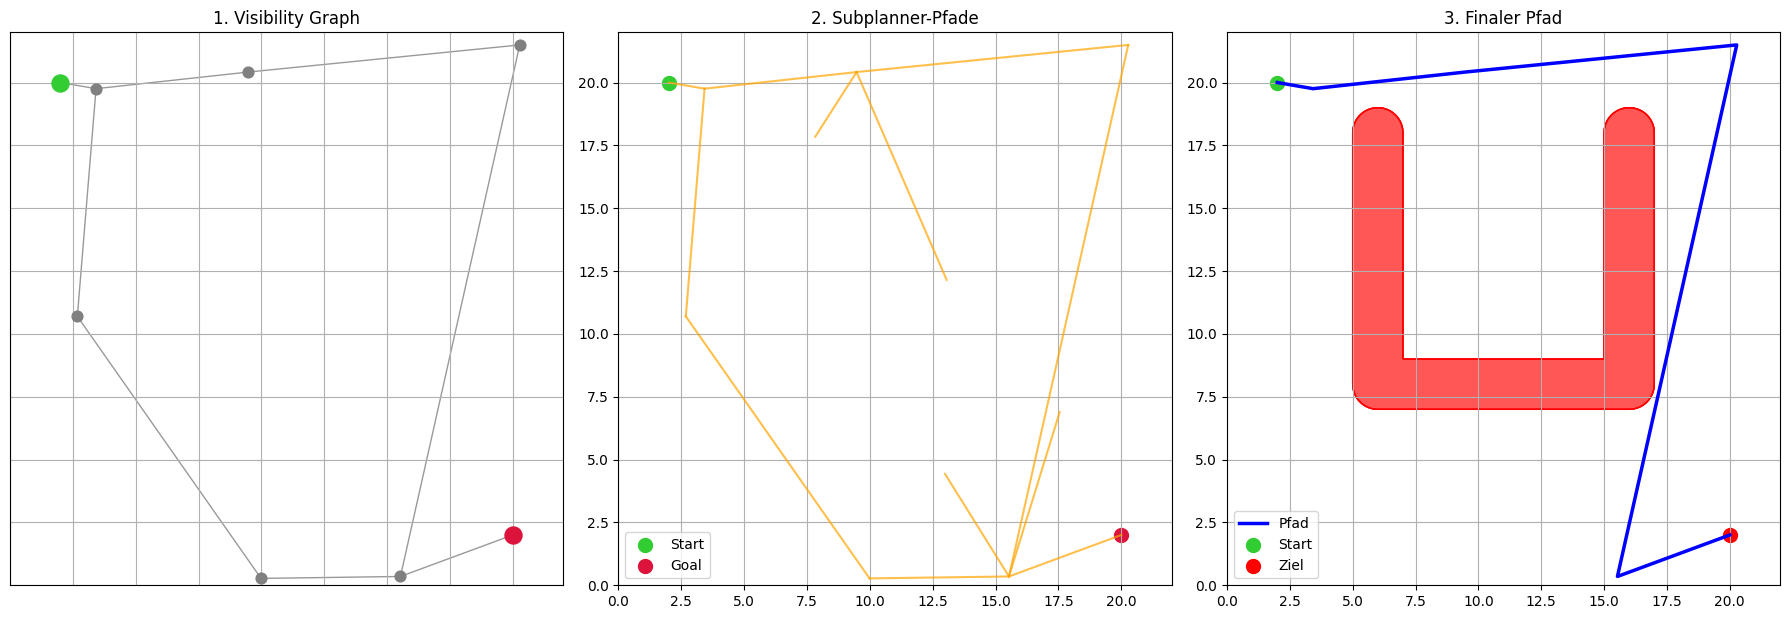


🔍 Szene: L-Shape

🔎 Prüfe Punkt 0 bei [7.375299353049797, 4.3327234355107915]
🛡️ Punkt 0 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 1 bei [7.0383408852417375, 16.8151960801784]
🛡️ Punkt 1 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 2 bei [4.806780756880901, 7.271809645381255]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 2 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 3 bei [10.089928823969029, 20.932405248643494]
   ✅ Sichtverbindung zu Guard 1 gefunden
❌ Punkt 3 verworfen (nur eine Sichtverbindung zu Guard 1)

🔎 Prüfe Punkt 4 bei [20.868775041773127, 0.9027879830826635]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 4 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 5 bei [20.769443421322887, 16.752566943746075]
🛡️ Punkt 5 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 6 bei [15.339343979023466, 6.679921932358273]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 6 verworfe

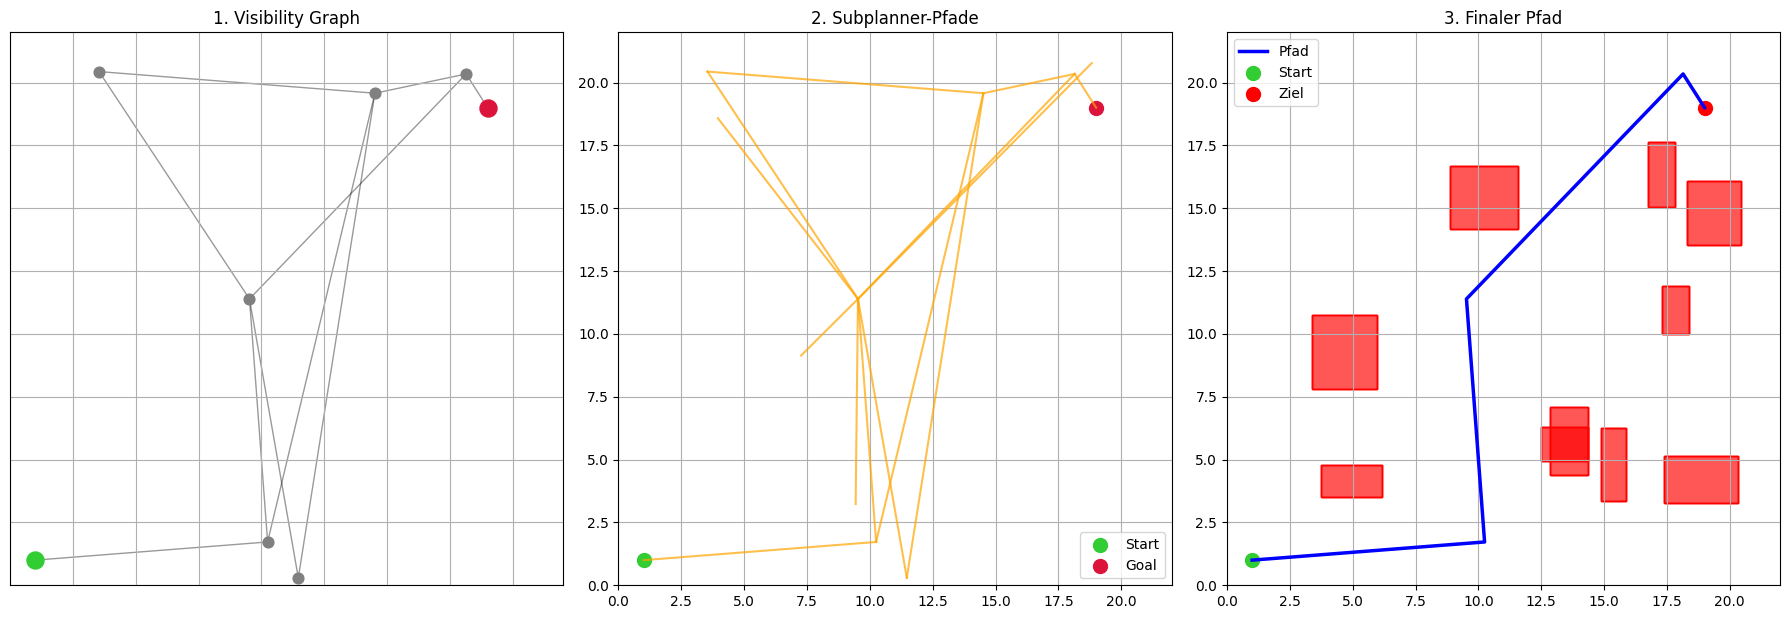


🔁 Starte Benchmarks mit Subplanner: Basic

🔍 Szene: U-Shape

🔎 Prüfe Punkt 0 bei [8.918757372407114, 19.83456428140227]
🛡️ Punkt 0 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 1 bei [21.84200084207564, 12.304770331256012]
🛡️ Punkt 1 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 2 bei [20.44824039486811, 18.781900667197526]
   ✅ Sichtverbindung zu Guard 0 gefunden
   ✅ Sichtverbindung zu Guard 1 gefunden
🔗 Punkt 2 als Connection verbunden mit Guards 0 und 1

🔎 Prüfe Punkt 3 bei [17.8871317780174, 16.083889320190806]
   ✅ Sichtverbindung zu Guard 1 gefunden
❌ Punkt 3 verworfen (nur eine Sichtverbindung zu Guard 1)

🔎 Prüfe Punkt 4 bei [10.405969581785598, 16.76294833150104]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 4 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 5 bei [9.08318869503228, 21.39873366447248]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 5 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Pun

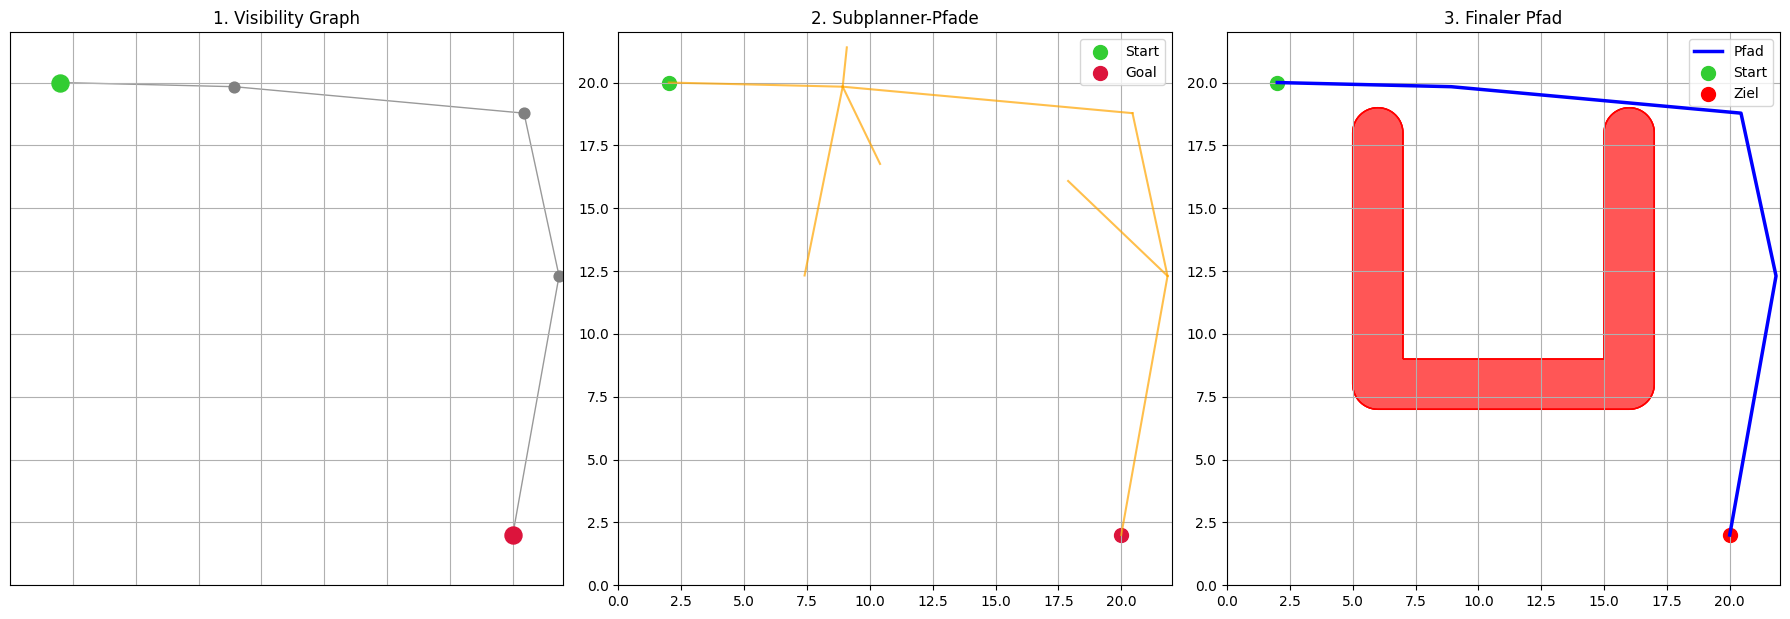


🔍 Szene: L-Shape

🔎 Prüfe Punkt 0 bei [17.167531959940554, 0.6246812996164304]
🛡️ Punkt 0 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 1 bei [1.7474775241475788, 18.717737402202847]
🛡️ Punkt 1 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 2 bei [3.940961536466676, 0.6001436265864546]
   ✅ Sichtverbindung zu Guard 0 gefunden
   ✅ Sichtverbindung zu Guard 1 gefunden
🔗 Punkt 2 als Connection verbunden mit Guards 0 und 1

🔎 Prüfe Punkt 3 bei [10.201849428509641, 3.367892044622403]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 3 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 4 bei [1.2265863768840937, 5.715475414643467]
   ✅ Sichtverbindung zu Guard 0 gefunden
   ✅ Sichtverbindung zu Guard 1 gefunden
🔗 Punkt 4 als Connection verbunden mit Guards 0 und 1

🔎 Prüfe Punkt 5 bei [6.009598244738164, 4.971463434960356]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 5 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punk

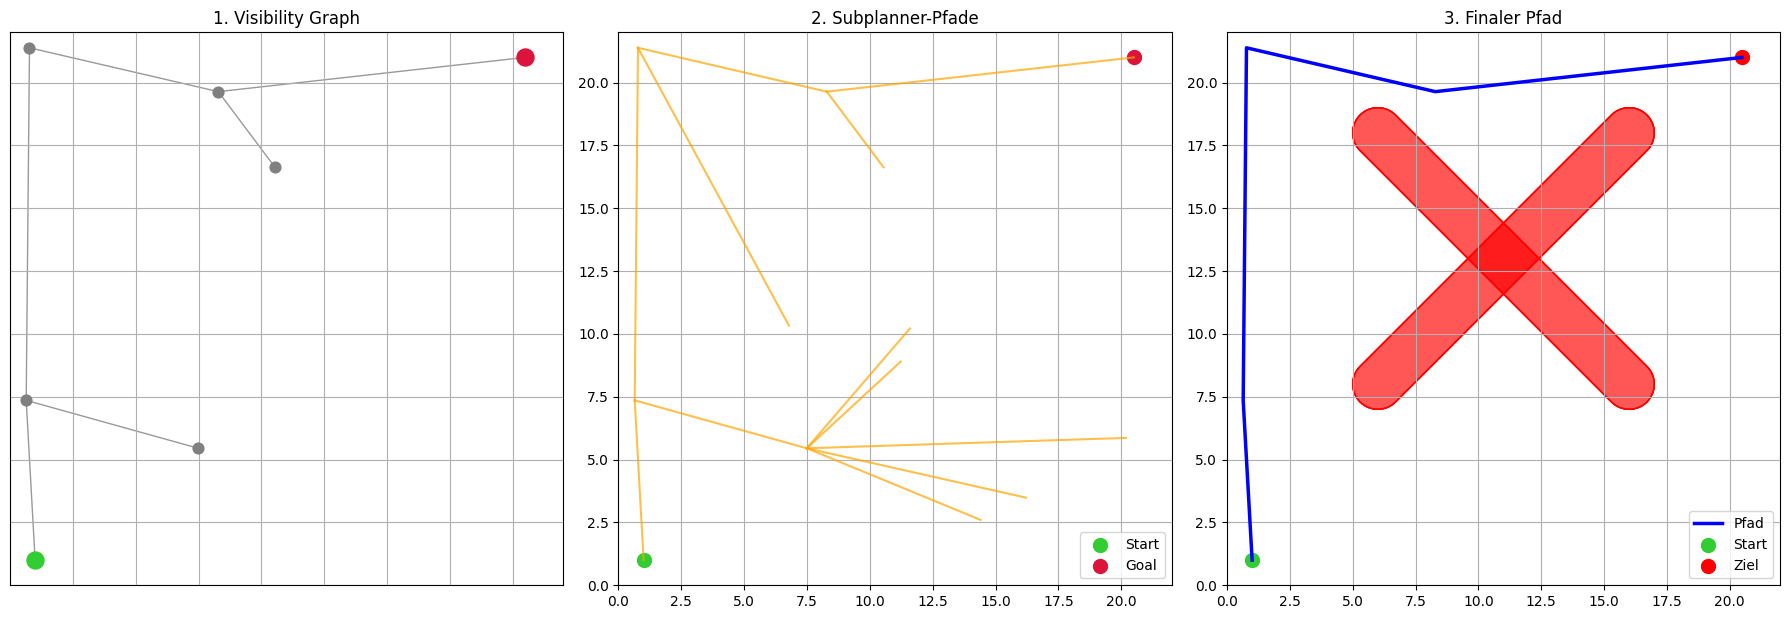


🔍 Szene: Random Obstacles

🔎 Prüfe Punkt 0 bei [1.739080531078853, 6.681253398849902]
🛡️ Punkt 0 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 1 bei [21.48571418469161, 8.068991298691746]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 1 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 2 bei [18.600573304662564, 18.58788503871561]
🛡️ Punkt 2 als neuer Guard hinzugefügt (keine Verbindung möglich)

🔎 Prüfe Punkt 3 bei [4.878358256420099, 1.7966142560735363]
   ✅ Sichtverbindung zu Guard 0 gefunden
❌ Punkt 3 verworfen (nur eine Sichtverbindung zu Guard 0)

🔎 Prüfe Punkt 4 bei [11.994216626912012, 18.72335364563226]
   ✅ Sichtverbindung zu Guard 2 gefunden
❌ Punkt 4 verworfen (nur eine Sichtverbindung zu Guard 2)

🔎 Prüfe Punkt 5 bei [15.929690415472955, 18.180985173438454]
   ✅ Sichtverbindung zu Guard 2 gefunden
❌ Punkt 5 verworfen (nur eine Sichtverbindung zu Guard 2)

🔎 Prüfe Punkt 6 bei [20.02171201017709, 18.170493946787847]
   ✅ Sichtverbindun

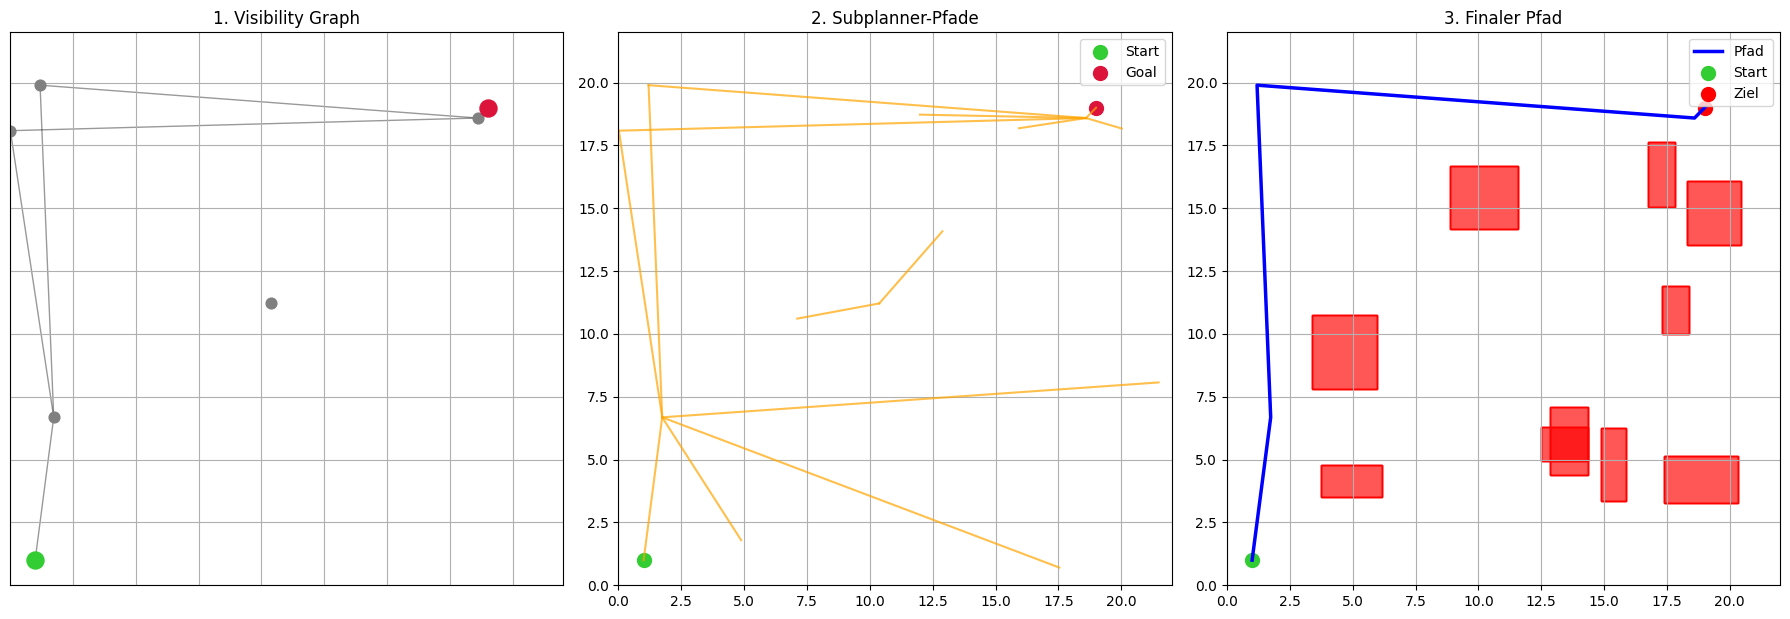


✅ Alle Benchmarks abgeschlossen.


In [4]:
# 🔁 Beide Runs durchführen
all_results = []

# Lazy
lazy_results = run_benchmark("Lazy", config_low_lazy)
pd.DataFrame(lazy_results).to_csv(os.path.join(results_dir, "Hierarchical-Lazy_results.csv"), index=False)
all_results.extend(lazy_results)

# Basic
basic_results = run_benchmark("Basic", config_low_basic)
pd.DataFrame(basic_results).to_csv(os.path.join(results_dir, "Hierarchical-Basic_results.csv"), index=False)
all_results.extend(basic_results)

# Zusammengefasst
pd.DataFrame(all_results).to_csv(os.path.join(results_dir, "Hierarchical_ALL_results.csv"), index=False)
print("\n✅ Alle Benchmarks abgeschlossen.")

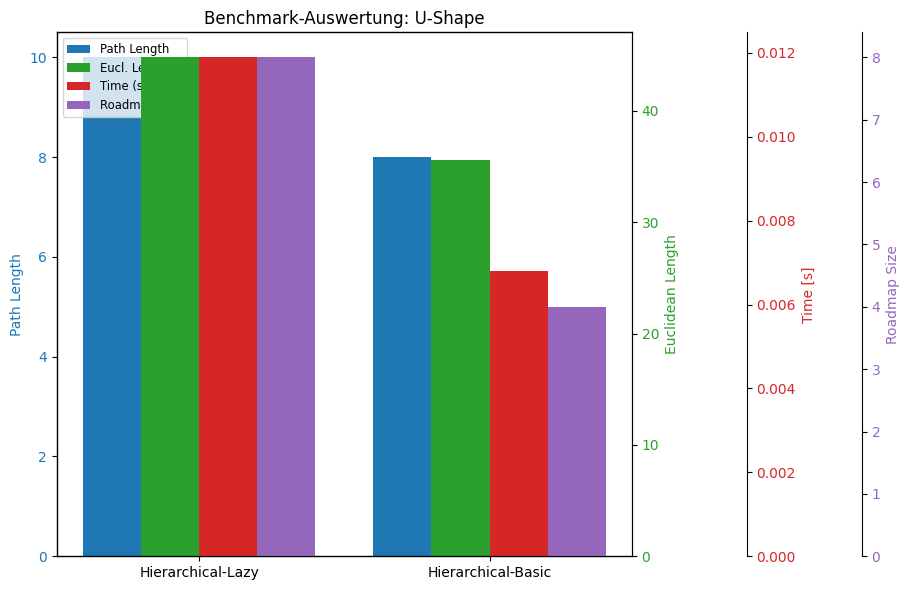

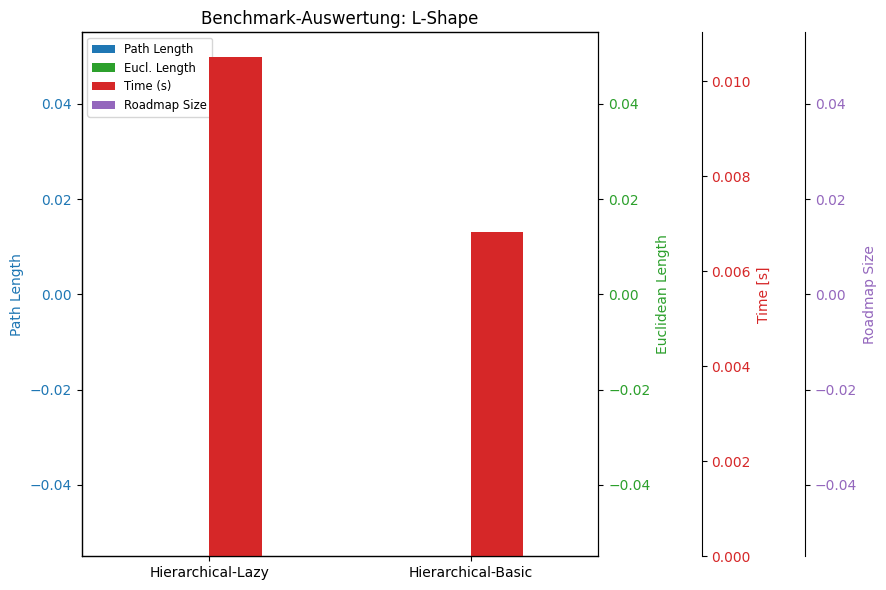

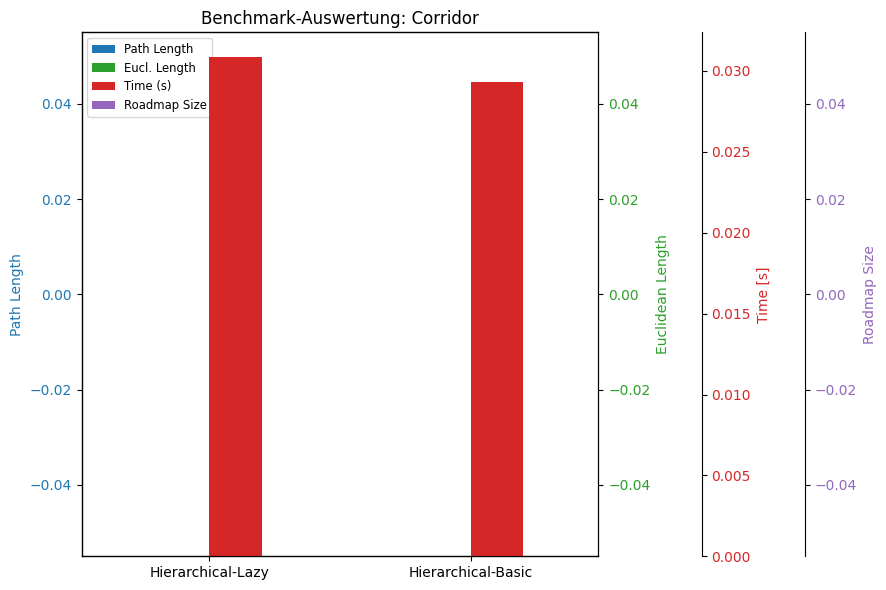

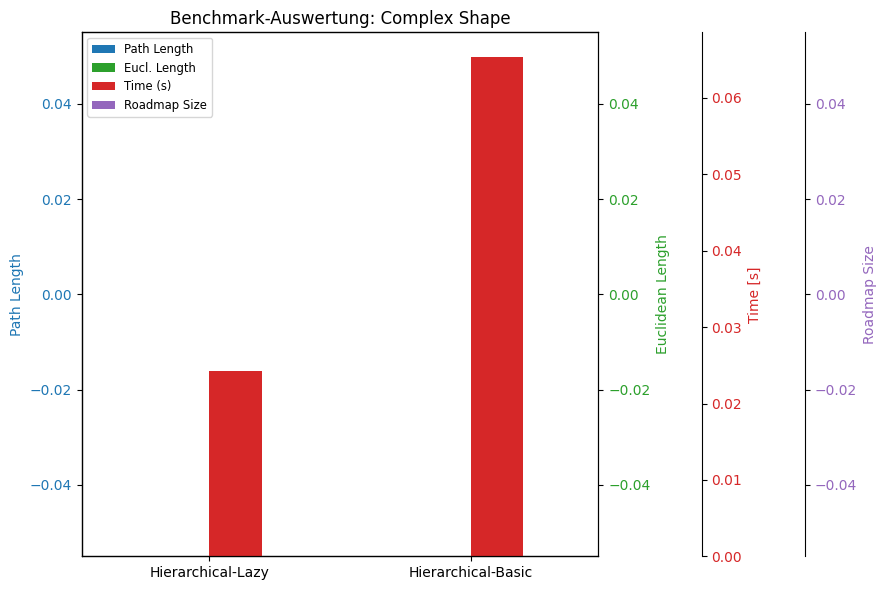

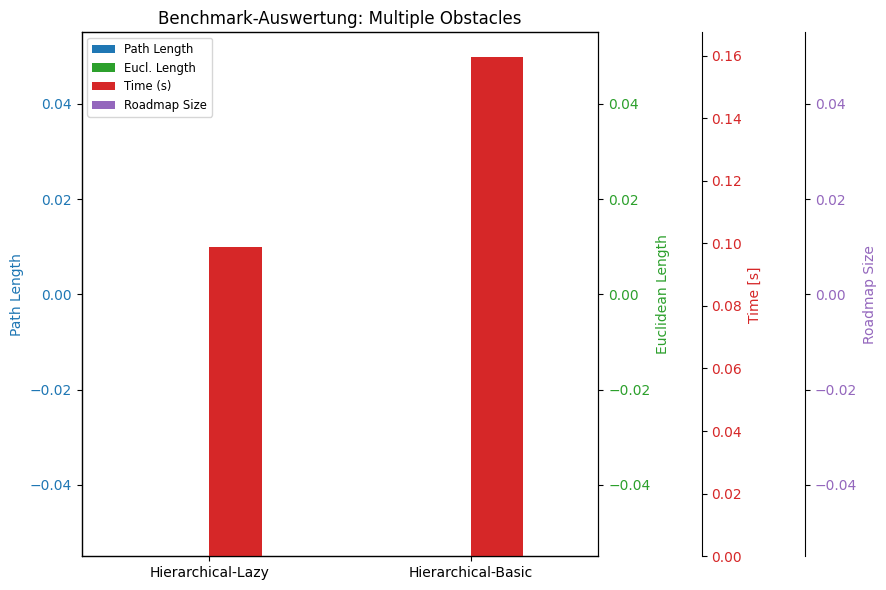

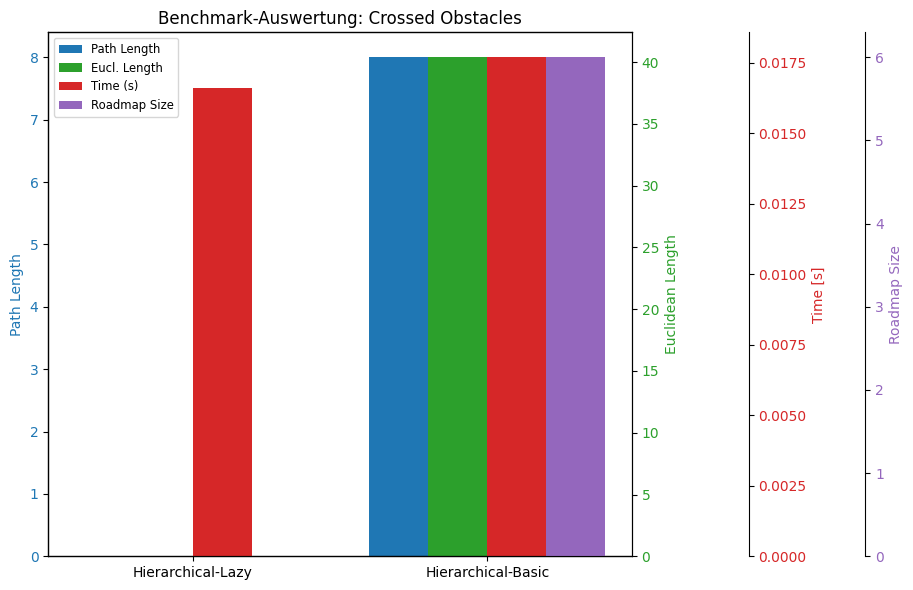

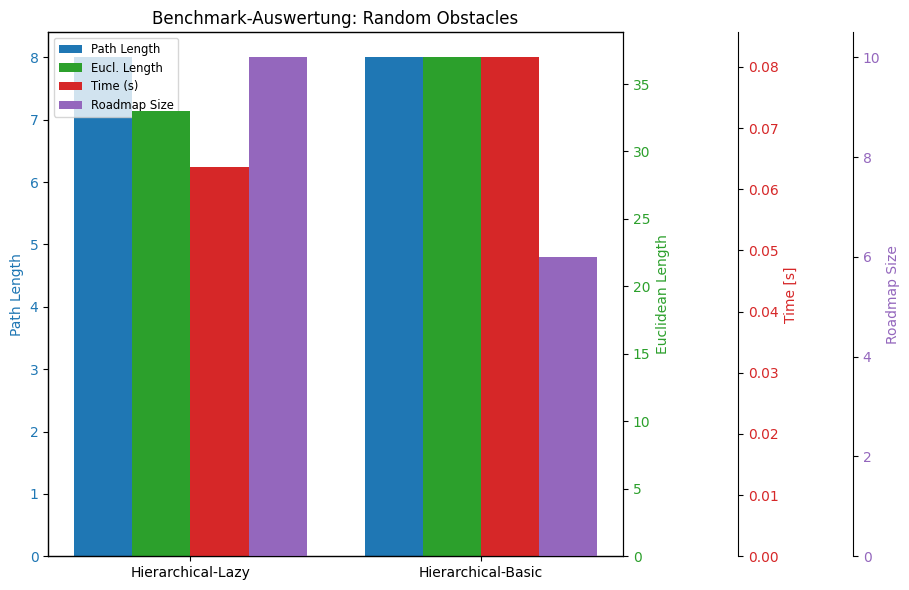

In [5]:
# Visualisierung
result_df = pd.DataFrame(all_results)
for scene in result_df["scene"].unique():
    df = result_df[result_df["scene"] == scene]
    fig, ax1 = plt.subplots(figsize=(10, 6))
    width = 0.2
    idx = np.arange(len(df))

    ax1.bar(idx, df["length"], width, label="Path Length", color="#1f77b4")
    ax1.set_ylabel("Path Length", color="#1f77b4")
    ax1.tick_params(axis='y', labelcolor="#1f77b4")

    ax2 = ax1.twinx()
    ax2.bar(idx + width, df["euclidean_length"], width, label="Eucl. Length", color="#2ca02c")
    ax2.set_ylabel("Euclidean Length", color="#2ca02c")
    ax2.tick_params(axis='y', labelcolor="#2ca02c")

    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('axes', 1.2))
    ax3.bar(idx + 2 * width, df["time"], width, label="Time (s)", color="#d62728")
    ax3.set_ylabel("Time [s]", color="#d62728")
    ax3.tick_params(axis='y', labelcolor="#d62728")

    ax4 = ax1.twinx()
    ax4.spines['right'].set_position(('axes', 1.4))
    ax4.bar(idx + 3 * width, df["roadmap_size"], width, label="Roadmap Size", color="#9467bd")
    ax4.set_ylabel("Roadmap Size", color="#9467bd")
    ax4.tick_params(axis='y', labelcolor="#9467bd")

    ax1.set_xticks(idx + 1.5 * width)
    ax1.set_xticklabels(df["planner"].values)
    ax1.set_title(f"Benchmark-Auswertung: {scene}")

    handles, labels = [], []
    for ax in [ax1, ax2, ax3, ax4]:
        h, l = ax.get_legend_handles_labels()
        handles.extend(h)
        labels.extend(l)
    ax1.legend(handles, labels, loc="upper left", fontsize="small")

    plt.tight_layout()
    plt.show()

In [6]:
# --- Pfadplanung ---
hier_planner = HierarchicalPlanner(
    scene=scenes[0][1][0],  # Nimm die erste Szene
    limits=scenes[0][1][1],
    GlobalPlannerClass=VisibilityPRM,
    LocalPlannerClass=LazyPRM,  # Oder BasicPRM
    config_global=config_high,
    config_local=config_low_lazy  # Oder config_low_basic
)

start = [list(scenes[0][1][2][0])]
goal = [list(scenes[0][1][2][1])]
path = hier_planner.plan_path(start, goal)
if not path:
    print("❌ Kein Pfad gefunden.")
else:
    print("✅ Pfad gefunden mit", len(path), "Punkten")

    # Korrekte Reihenfolge der Initialisierung für die Visualisierung
    hier_planner.solution_path = path  # Statt final_path
    hier_planner.graph = hier_planner.global_planner.graph  # Verwende direkt den globalen Planer-Graph

    collision_checker = CollisionChecker(hier_planner.scene, hier_planner.limits)
    visualize_hierarchical_planning(hier_planner, collision_checker, hier_planner.config_local)


NameError: name 'HierarchicalPlanner' is not defined

In [ ]:
# --- Jede Szene durchlaufen ---
config_low = {
    "initialRoadmapSize": 100,
    "kNearest": 10,
    "maxIterations": 20,
    "updateRoadmapSize": 50
}
for name, (scene, limits, (start_tuple, goal_tuple)) in scenes:
    print(f"\n🔄 Verarbeite Szene: {name}")

    # Start- und Zielposition ins passende Format bringen
    start = [list(start_tuple)]
    goal = [list(goal_tuple)]

    # Kollisionserkennung
    collision_checker = CollisionChecker(scene, limits)

    # Planer initialisieren
    hier_planner = HierarchicalPlanner(
        scene=scene,
        limits=limits,
        GlobalPlannerClass=VisibilityPRM,
        LocalPlannerClass=LazyPRM,
        config_global=config_high,
        config_local=config_low
    )

    # Pfadplanung
    path = hier_planner.plan_path(start, goal)
    if not path:
        print(f"❌ Kein Pfad gefunden in Szene: {name}")
        continue
    else:
        print(f"✅ Pfad gefunden in Szene: {name}, Länge: {len(path)}")

    # Visualisierung vorbereiten (optional, kann deaktiviert werden)
    hier_planner.solution_path = path
    hier_planner.graph = hier_planner.global_planner.graph
    visualize_hierarchical_planning(hier_planner, collision_checker, config_low)

    # Alternativ: Ergebnisse speichern oder zusammenfassen